## Customer Segmentation Project: K-Means Clustering

This is a project based on the article [Customer Segmentation using Python](https://medium.com/nerd-for-tech/customer-segmentation-using-python-e56c2b1a4c73) and the video [Data Analyst Portfolio Project #2: Python Customer Segmentation & Clustering](https://www.youtube.com/watch?v=iwUli5gIcU0).

__Customer segmentation__ is the process of dividing customers into groups in order to optimize a company's marketing strategy and maximize the value of each customer.

For this project, we'll cover the following steps:
1. Exploratory Data Analysis (EDA) of the dataset
    - Univariate Analysis
    - Bivariate and Multivariate Analysis
2. Segmentation using the K-Means algorithm
    - Univariate Clustering
    - Bivariate Clustering
    - Multivariate Clustering

<a id='section_1'></a>
### 1. Exploratory Data Analysis (EDA) of the dataset

First we'll import the libraries we'll use in this project.

In [135]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="dark")
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Next we're going to read the file into a dataframe and take a look at the first few rows of the dataset

In [136]:
df = pd.read_csv("Mall_Customers.csv")

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


We're also going to confirm the total number of rows, if there are any null values and the type of data of each column.

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


There are a total of five columns with 200 rows and no null values. There are four columns which are numeric and one which is a string.

Let's also understand the distribuition of the numeric columns.

In [138]:
df.describe().applymap('{:,.0f}'.format)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200,200,200,200
mean,100,39,61,50
std,58,14,26,26
min,1,18,15,1
25%,51,29,42,35
50%,100,36,62,50
75%,150,49,78,73
max,200,70,137,99


Now we can summarize the information of each column like this:
- CustomerID: a numeric column to identify the customer ranging from 1 to 200 with no null values
- Gender: a string column that identifies the client as Female or Male with no null values
- Age: a numeric column with the age of the customer ranging from 18 to 70 years old and no null values
- Annual Income (k$): a numeric column describing the annual income of the customer in thousand dollars ranging from 15 to 137 and no null values
- Spending Score (1- 100): a numeric column classifying the score of that customer ranging from 1 to 99 and no null values

Since the CustomerID won't be helpful in classifying the customers, we'll drop it from our dataset.

In [139]:
df = df.drop('CustomerID', axis=1)

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


Before we jump into clustering the groups of customers, it's also important to analyze the distribution of each variable and the relationship between them, if there's any. That's why we'll move now to do a Univariate, Bivariate and Multivariate Analysis.

<a id='section_1.1'></a>
#### Univariate Analysis

We'll take a look at each of the numeric variables and their distributions using histograms.

In [140]:
## text of max and min values for income
# max value
income_bins = df['Annual Income (k$)'].value_counts(bins=10).sort_index()
income_y_max = income_bins.max()
income_x_max = income_bins[income_bins == income_y_max].index[0].mid - 3
# min value
income_y_min = income_bins.min()
income_x_min = income_bins[income_bins == income_y_min].index[0].mid - 1

## text of max and min values for age
# max value
age_bins = df['Age'].value_counts(bins=10).sort_index()
age_y_max = age_bins.max()
age_x_max = age_bins[age_bins == age_y_max].index[0].mid - 1.5
# min value
age_y_min = age_bins.min()
age_x_min = age_bins[age_bins == age_y_min].index[0].mid - 0.8

## text of max and min values for spending score
# max value
score_index_bins = pd.IntervalIndex.from_tuples(
    [(0,10),(10,20),(20,30),(30,40),(40,49),(49,59),(59,70),(70,80),(80,90),(90,100)]
    )
score_bins = pd.cut(df['Spending Score (1-100)'], bins=score_index_bins).value_counts().sort_index()
score_y_max = score_bins.max()
score_x_max = score_bins[score_bins == score_y_max].index[0].mid - 2
# min value
score_y_min = score_bins.min()
score_x_min = score_bins[score_bins == score_y_min].index[0].mid - 2

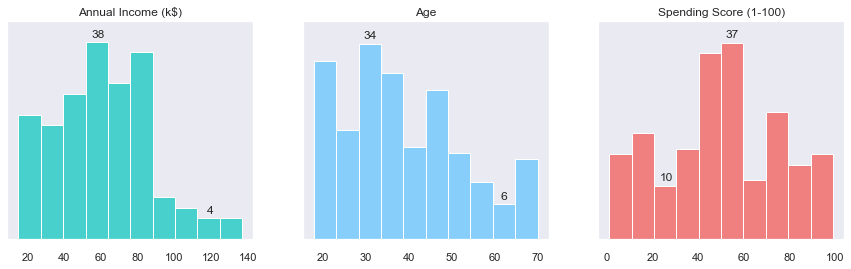

In [141]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

# first histogram
ax[0].hist(df['Annual Income (k$)'], color='mediumturquoise')
ax[0].set_title('Annual Income (k$)')
ax[0].set_yticklabels('')
ax[0].set_ylim(top=42)

## text of max and min values
ax[0].annotate(text=str(income_y_max), xy=(income_x_max, income_y_max+1))
ax[0].annotate(text=str(income_y_min), xy=(income_x_min, income_y_min+1))

# second histogram
ax[1].hist(df['Age'], color='lightskyblue')
ax[1].set_title('Age')
ax[1].set_yticklabels('')
ax[1].set_ylim(top=38)

## text of max and min values
ax[1].annotate(text=str(age_y_max), xy=(age_x_max, age_y_max+1))
ax[1].annotate(text=str(age_y_min), xy=(age_x_min, age_y_min+1))

# third histogram
ax[2].hist(df['Spending Score (1-100)'], bins=10, color='lightcoral')
ax[2].set_title('Spending Score (1-100)')
ax[2].set_yticklabels('')
ax[2].set_ylim(top=41)

## text of max and min values
ax[2].annotate(text=str(score_y_max), xy=(score_x_max, score_y_max+1))
ax[2].annotate(text=str(score_y_min), xy=(score_x_min, score_y_min+1))

plt.show()

The three numeric columns follow a normal distribution, with the Annual Income and the Age variables being more right skewed. Most people have an income between 60 and 80 thousand dollars, around 30 years old and a Spending Score between 40 and 60.

Now we're going to take a look at the distribution of the Gender column using a bar chart.

In [142]:
# calculate percent of females and change type to integer
female_absolute = df['Gender'].value_counts()[0]
female_percentage = df['Gender'].value_counts(normalize=True)[0] * 100
female_percentage = int(female_percentage)

# calculate percent of males and change type to integer
male_absolute = df['Gender'].value_counts()[1]
male_percentage = df['Gender'].value_counts(normalize=True)[1] * 100
male_percentage = int(male_percentage)

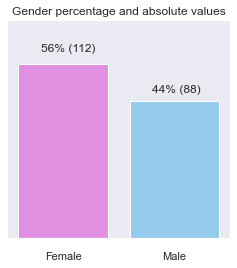

In [143]:
# plot bar char for gender column
x = df['Gender'].value_counts(normalize=True).index
y = df['Gender'].value_counts(normalize=True).values
my_pal = {'Male':'lightskyblue', 'Female':'violet'}

fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(x=x, y=y, palette=my_pal)
plt.title('Gender percentage and absolute values')
plt.ylim(0, 0.7)
plt.xticks(rotation=0)
plt.yticks(ticks=[])
plt.text(-0.2, 0.6, '{}% ({})'.format(female_percentage, female_absolute))
plt.text(0.8, 0.47, '{}% ({})'.format(male_percentage, male_absolute))

plt.show()

We see that there's a majority of women, about 56%, against 44% of men in the sample.

Now let's also check out what's the distribution like of the numeric columns considering each gender. We'll use boxplots for this visualization.

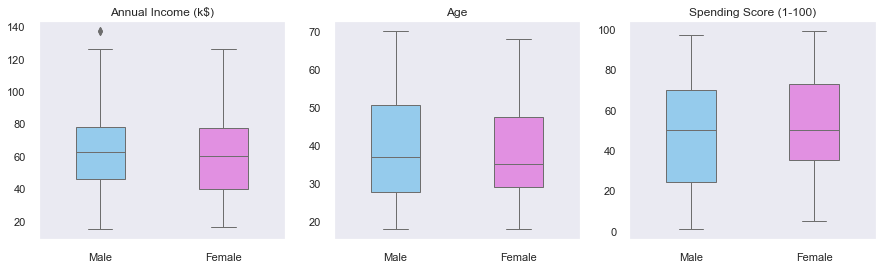

In [144]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

sns.boxplot(y='Annual Income (k$)', x='Gender', data=df, ax=ax[0], width=0.4, palette=my_pal, linewidth=1)
ax[0].set_title('Annual Income (k$)')

sns.boxplot(y='Age', x='Gender', data=df, ax=ax[1], width=0.4, palette=my_pal, linewidth=1)
ax[1].set_title('Age')

sns.boxplot(y='Spending Score (1-100)', x='Gender', data=df, ax=ax[2], width=0.4, palette=my_pal, linewidth=1)
ax[2].set_title('Spending Score (1-100)')

for i in range(0,3):
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')

plt.show()

Considering the Annual Income, the distribution is similar between men and women, except for a few outliers on the male category. The second quartile (between the 25th and the 50th percentile) is a bit longer for women, which means that the data is more dispersed, there's more variability for women.

The distribution of Age for men and women is also alike, with the upper whisker in the Male boxplot ranging until 70 years old. The third quartile of men is longer than the one of women, also demonstrating a bigger disperson of the data here.

As for the Spending Score, the lowest score for women is higher than the one for men. The distribution, in general, is similar between both genders. The second quartile of men is longer than the one of women, which indicates that it's more spread.

Before moving on to the next part, let's take a look at the outliers in the Annual Income column.

In [145]:
df[df['Annual Income (k$)'] > 130]

,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,Male,32,137,18
199,Male,30,137,83


There are two outliers, men, around the same age, but their spending scores are very different.

<a id='section_1.2'></a>
#### Bivariate and Multivariate Analysis

Now we're going to analyze the relationship of each pair of numeric variables using a pair plot. We'll also include the gender variable by using different colors in each plot.

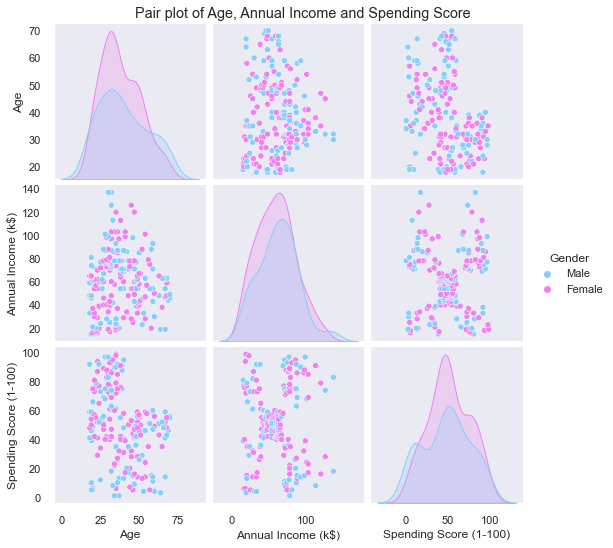

In [146]:
pp = sns.pairplot(data=df, hue='Gender', palette=my_pal)
pp.fig.suptitle('Pair plot of Age, Annual Income and Spending Score', y=1.01)
plt.show()

In general, there doesn't seem to be a clear, strong correlation between any two variables. However, when we look at the scatter plot between Annual Income and Spending Score, it's possible to group customers into different categories.

Considering the three variables in the histograms, we also see that they follow a normal distribution, with the presence of more women in the sample.

We'll analyze below what are the means for each numeric column considereing each gender:

In [147]:
df.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().applymap('{:,.0f}'.format)

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38,59,52
Male,40,62,49


Males are, on average, two years olders than females with an income 3,000 higher. On the other hand, men have a slight worse spending score than women.

Let's move on and see what is the exact correlation between the variables.

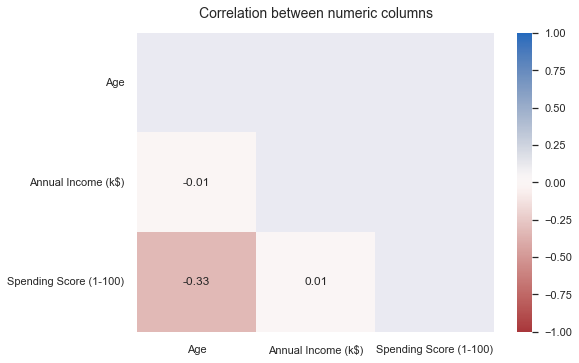

In [148]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

heatmap = sns.heatmap(df.corr().round(2), annot=True, cmap='vlag_r', mask=mask, vmin=-1, vmax=1)
heatmap.set_title('Correlation between numeric columns', fontdict={'fontsize':14}, pad=15)
plt.show()

There isn't a strong correlation between the variables. Age has a negative correlation with Spending Score, which means that the higher the age, the lower the spending score. However, this correlation of -0.33 is still a week one, which can also be seen in the scatter plot we showed before.

We'll move on now to segment the groups of customers using the K-Means algorithm.

<a id='section_2'></a>
### Segmentation using the K-Means algorithm
<a id='section_2.1'></a>
### Univariate Clustering

We'll follow the steps below to test the Univariate Clustering:
1. Initiate the K-Means algorithm
2. Fit the data using the Annual Income column
3. Get the cluster labels assigned by the algorithm for each data point
4. Assign these labels to a column in the original dataframe

In [149]:
# initiate the algorithm
clustering_univariate = KMeans()

# fit the data
clustering_univariate.fit(df[['Annual Income (k$)']])

# get labels assigned by the algorithm
clustering_univariate.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3,
       3, 3])

In [150]:
# assign labels to a column in the original datafram
df['Univariate Cluster'] = clustering_univariate.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Univariate Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


Let's plot the Annual Income and Income Cluster columns to see what the results look like.

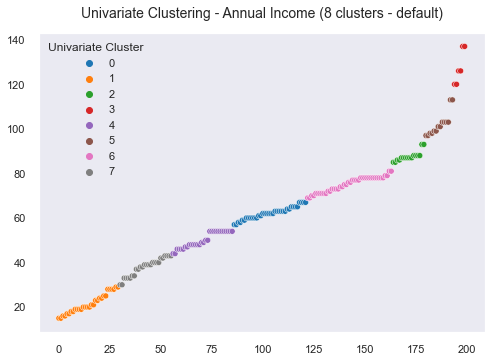

In [151]:
scatter_plot = sns.scatterplot(x=df.index, 
                                y=df['Annual Income (k$)'], 
                                hue=df['Univariate Cluster'],
                                palette='tab10'
                                )

scatter_plot.set_title('Univariate Clustering - Annual Income (8 clusters - default)', fontdict={'fontsize':14}, pad=15)

plt.ylabel('')
plt.show()

Here we see that, by default, the clients were split into 8 groups according to their Annual Income.

One more adjustment we can make in order to improve these results is to find the best number of clusters to group our customers, since we didn't set that argument while initiating the algorithm. 

In order to do that, we can use the Elbow Method to discover what is the ideal number of clusters. [The method is based on calculating the Within-Cluster-Sum of Squared Errors (WSS) for different number of clusters (k) and selecting the k for which change in WSS first starts to diminish.](https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad#:~:text=our%20K%20means.-,Elbow%20Method,WSS%20first%20starts%20to%20diminish)

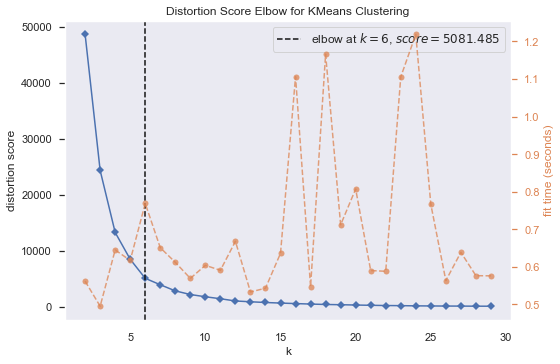

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [152]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings=True)
visualizer.fit(df[['Annual Income (k$)']])        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In this case, the optimal number of clusters is 6, so now we can adjust the algorithm accordingly.

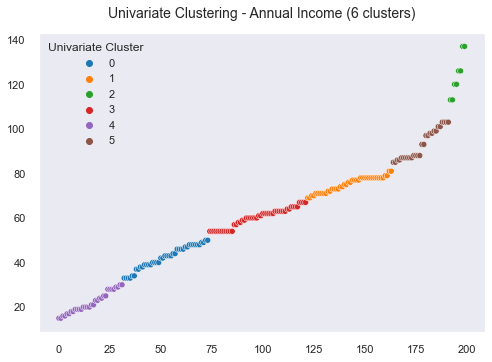

In [153]:
# initiate the algorithm
clustering_univariate = KMeans(n_clusters=6)

# fit the data
clustering_univariate.fit(df[['Annual Income (k$)']])

# get labels assigned by the algorithm
clustering_univariate.labels_

# assign labels to a column in the original datafram
df['Univariate Cluster'] = clustering_univariate.labels_

# plot clusters
scatter_plot = sns.scatterplot(x=df.index, 
                                y=df['Annual Income (k$)'], 
                                hue=df['Univariate Cluster'],
                                palette='tab10'
                                )
scatter_plot.set_title('Univariate Clustering - Annual Income (6 clusters)', fontdict={'fontsize':14}, pad=15)
plt.ylabel('')
plt.show()

Let's see what is the mean of each cluster considering the numeric columns.

In [154]:
df.groupby('Univariate Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().applymap('{:,.0f}'.format)

,Age,Annual Income (k$),Spending Score (1-100)
Univariate Cluster,,,
0,43,42,51
1,35,75,51
2,36,124,50
3,42,60,49
4,35,22,50
5,38,93,51


The average Spending Score is pretty much the same for all clusters. The main difference can be found in the Annual Income column, since it was used to cluster the clients. And the average Age ranges from 35 to 43.

Now we can move on to Bivariate Clustering, which means we'll use two variables to cluster the clients.

<a id='section_2.2'></a>
#### Bivariate Clustering

We'll use the Annual Income and the Spending Score columns to cluster the clients.

In order to find the optimal number of clusters, we'll use the Elbow Method as well.

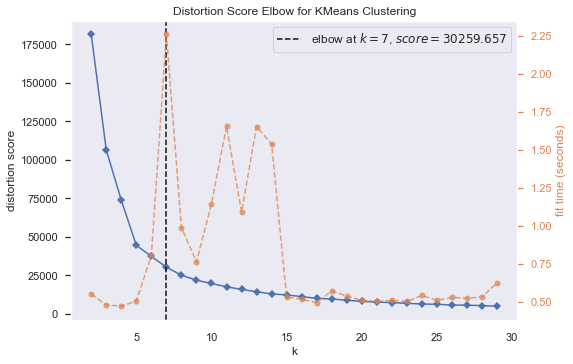

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [155]:
# Elbow Method for K means
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings=True)
visualizer.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

We'll use then 7 clusters to classify the clients.

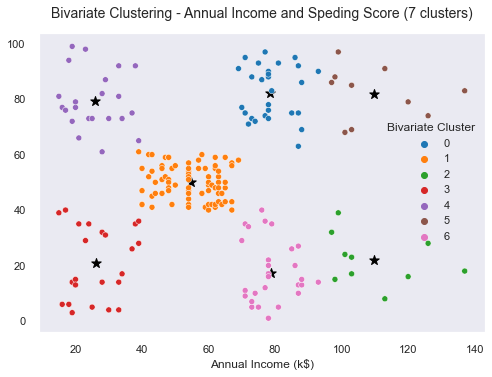

In [156]:
# initiate the algorithm
clustering_bivariate = KMeans(n_clusters=7)

# fit the data
clustering_bivariate.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])

# get labels assigned by the algorithm
clustering_bivariate.labels_

# assign labels to a column in the original datafram
df['Bivariate Cluster'] = clustering_bivariate.labels_

# get centroids of each cluster and plot them
centers = pd.DataFrame(clustering_bivariate.cluster_centers_)
centers.columns = ['x', 'y']
plt.scatter(x=centers['x'], y=centers['y'], s=100, c='black', marker='*')

# plot clusters
scatter_plot = sns.scatterplot(x=df['Annual Income (k$)'], 
                                y=df['Spending Score (1-100)'], 
                                hue=df['Bivariate Cluster'],
                                palette='tab10'
                                )
scatter_plot.set_title('Bivariate Clustering - Annual Income and Speding Score (7 clusters)', 
                        fontdict={'fontsize':14}, 
                        pad=15)
plt.ylabel('')
plt.show()

We can see that the clustering was able to split the customers into very distinct groups considering the Annual Income and their Spending Score. Let's also take a look at the distribution of each cluster by Gender, to see if there's anything in particular.

In [157]:
bivariate_cluster_gender = pd.crosstab(df['Bivariate Cluster'], df['Gender'], normalize='index') * 100

bivariate_cluster_gender.applymap('{:,.0f}'.format)

Gender,Female,Male
Bivariate Cluster,,
0,52,48
1,59,41
2,70,30
3,61,39
4,59,41
5,60,40
6,39,61


In general, there are between 54% and 61% of women in clusters 0, 2, 3, 4 and 6. In the meantime, the cluster 5 stands out by the lower percentage of women (39%) and the cluster 1 by the higher percentage of women (70%). It's something to be considered when targeting each cluster.

Let's also look at the average Age of each cluster.

In [158]:
df.groupby('Bivariate Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().applymap('{:,.0f}'.format)

,Age,Annual Income (k$),Spending Score (1-100)
Bivariate Cluster,,,
0,33,79,82
1,43,55,50
2,41,110,22
3,45,26,21
4,25,26,79
5,32,110,82
6,40,79,17


So two of the clusters with the highest Spending Scores are 3 and 6, which are very similar in terms of Gender (54% x 55% of women) and Age (33 x 32 years old), differentiating more in Annual Income (\$ 78 k x $ 100 k). 

We could also target another interesting cluster, which is the 2, with the third highest average Spending Score. The customers in this cluster are predominatly women (59%), younger than other clusters (25 years old on average) and have a lower Annual Income ($ 26 k). We would need to understand better what kinds of products or purchase patterns which are influencing this high spending score and how to target them efficiently.

Now we can move to the last type of clustering.

<a id='section_2.3'></a>
#### Multivariate Clustering

We'll need to do some pre-processing before we cluster the customers using all variables

First we need to turn the Gender column from categorical to numeric in order to use it in the algorithm.

In [159]:
# select columns to use and then turn categorical to numeric
df_multivariate = pd.get_dummies(df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

df_multivariate.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


Since we only need one of the gender columns for the algorithm to work, we'll keep the Gender_Female and drop the other one.

In [160]:
df_multivariate = df_multivariate.drop('Gender_Male', axis=1)

df_multivariate.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1


Since the columns have values with different ranges, we'll scale them in order for each one to be accounted evenly in the fitting process.

In [161]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

df_scaled = pd.DataFrame(scale.fit_transform(df_multivariate))

df_scaled.columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender Female']

df_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender Female
0,-1.424569,-1.738999,-0.434801,-1.128152
1,-1.281035,-1.738999,1.195704,-1.128152
2,-1.352802,-1.700830,-1.715913,0.886405
3,-1.137502,-1.700830,1.040418,0.886405
4,-0.563369,-1.662660,-0.395980,0.886405


We need to find the optimal number of clusters for this analysis, so we'll use once again the Elbow Method.

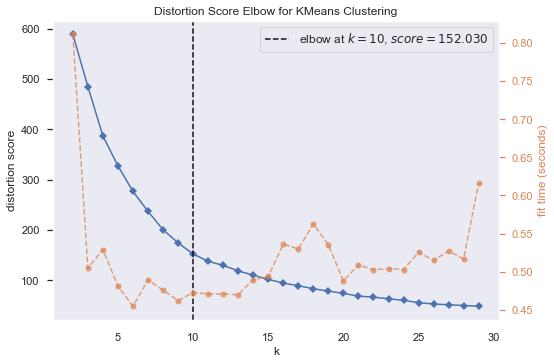

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [162]:
# Elbow Method for K means
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings=True)
visualizer.fit(df_scaled)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In [163]:
# initiate the algorithm
clustering_multivariate = KMeans(n_clusters=10)

# fit the data
clustering_multivariate.fit(df_scaled)

# get labels assigned by the algorithm
clustering_multivariate.labels_

# assign labels to a column in the original datafram
df_multivariate['Multivariate Cluster'] = clustering_multivariate.labels_

We'll summarize the clusters statistics in order to analyze them.

In [164]:
df_multivariate_summary = df_multivariate.groupby('Multivariate Cluster', as_index=False).mean()

df_multivariate_summary['Gender Female Percentage'] = (df_multivariate.groupby('Multivariate Cluster')['Gender_Female'].sum()/ df_multivariate.groupby('Multivariate Cluster')['Gender_Female'].count()) * 100

df_multivariate_summary

,Multivariate Cluster,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender Female Percentage
0,0,27.833333,58.125000,46.541667,1.000000,100.000000
1,1,25.250000,41.250000,60.916667,0.000000,0.000000
2,2,58.846154,48.692308,39.846154,0.000000,0.000000
3,3,54.080000,53.240000,49.520000,1.000000,100.000000
4,4,33.277778,87.111111,82.666667,0.000000,0.000000
5,5,32.190476,86.047619,81.666667,1.000000,100.000000
6,6,25.857143,26.642857,79.142857,1.000000,100.000000
7,7,38.473684,85.894737,14.210526,0.000000,0.000000
8,8,41.214286,26.071429,20.142857,0.928571,92.857143
9,9,44.600000,92.333333,21.600000,1.000000,100.000000


And now we'll plot them to have a better understanding of each cluster.

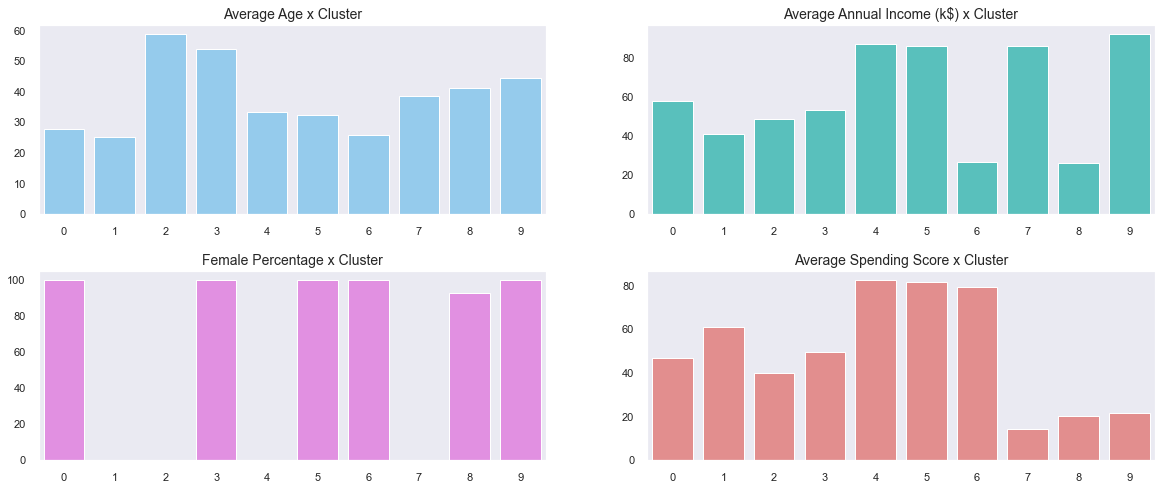

In [165]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,8))
plt.subplots_adjust(hspace=0.3)

sns.barplot(x='Multivariate Cluster', y='Age', data=df_multivariate_summary, ax=ax[0, 0], color='lightskyblue')
ax[0,0].set_title('Average Age x Cluster', fontsize=14)
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('')

sns.barplot(x='Multivariate Cluster', y='Annual Income (k$)', data=df_multivariate_summary, ax=ax[0, 1], color='mediumturquoise')
ax[0,1].set_title('Average Annual Income (k$) x Cluster', fontsize=14)
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')

sns.barplot(x='Multivariate Cluster', y='Gender Female Percentage', data=df_multivariate_summary, ax=ax[1, 0], color='violet')
ax[1,0].set_title('Female Percentage x Cluster', fontsize=14)
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel('')

sns.barplot(x='Multivariate Cluster', y='Spending Score (1-100)', data=df_multivariate_summary, ax=ax[1, 1], color='lightcoral')
ax[1,1].set_title('Average Spending Score x Cluster', fontsize=14)
ax[1,1].set_xlabel('')
ax[1,1].set_ylabel('')

plt.show()

Using this clustering, we have some groups very different characteristics:

- The clusters with the highest Spending Scores are: 2, 3 and 9
- While clusters 2 and 3 have also a higher Annual Income (around \$86 k), cluster 9 has one of the lowest average Annual Incomes (\$ 26 k)
- Considering the same clusters, 2 and 3 have about the same average Age (around 32 years old) and cluster 9 is, on average, a bit younger (26 years old)
- As for the Gender Percentage, there is here a clear distinction between clusters 2 and 3. Cluster 2 is made up of 100% women, while cluster 3 is 100% men. Cluster 9 is also 100% men.

These are some findings to help the Marketing team direct their strategy when trying to send email marketings, come up with offers, among other methods to help maximize their value and their loyalty to the company. It's also important to consider each and every one of the other clusters, even the ones with a lower spending score, in order to understand what strategies can be done to also improve their value or if any effort should be directed towards them.